In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

def analyze_and_visualize_digits(image_dataset_path, num_samples=25, num_clusters=10):
    """
    Analyze and visualize an unlabelled handwritten digits dataset.
    
    Parameters:
    - image_dataset_path (str): Path to the .npy file containing the dataset.
    - num_samples (int): Number of sample images to display in the grid.
    - num_clusters (int): Number of clusters for k-means (default 10 for digits 0-9).
    
    Returns:
    - None: Displays plots and prints analysis results.
    """
    
    # Load the dataset
    Xtrain_img = np.load(image_dataset_path)
    print("Dataset shape:", Xtrain_img.shape)
    print("Data type:", Xtrain_img.dtype)
    
    # Check pixel value range
    pixel_min, pixel_max = Xtrain_img.min(), Xtrain_img.max()
    print(f"Pixel value range: [{pixel_min}, {pixel_max}]")
    
    # Normalize pixel values to [0, 1] if needed
    if pixel_max > 1:
        Xtrain_img = Xtrain_img / 255.0
        print("Normalized pixel values to [0, 1]")
    
    # Reshape for visualization (remove channel dimension)
    Xtrain_2d = Xtrain_img.reshape(-1, 28, 28)
    print("Reshaped for visualization:", Xtrain_2d.shape)
    
    # Compute basic statistics
    pixel_mean = Xtrain_img.mean()
    pixel_std = Xtrain_img.std()
    print(f"Mean pixel value: {pixel_mean:.4f}, Std: {pixel_std:.4f}")
    
    # Plot pixel intensity distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(Xtrain_img.flatten(), bins=50, kde=True)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
    
    # Visualize sample images
    plt.figure(figsize=(10, 10))
    sample_indices = np.random.choice(Xtrain_2d.shape[0], num_samples, replace=False)
    for i, idx in enumerate(sample_indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(Xtrain_2d[idx], cmap='gray')
        plt.axis('off')
    plt.suptitle("Sample Handwritten Digits")
    plt.tight_layout()
    plt.show()
    
    # Reshape for PCA and clustering (flatten each image to 784 features)
    Xtrain_flat = Xtrain_img.reshape(Xtrain_img.shape[0], -1)
    print("Flattened shape for PCA/clustering:", Xtrain_flat.shape)
    
    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(Xtrain_flat)
    explained_variance_ratio = pca.explained_variance_ratio_.sum()
    print(f"PCA: Explained variance ratio (2 components): {explained_variance_ratio:.4f}")
    
    # Plot PCA results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.title("PCA Projection of Handwritten Digits")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()
    
    # Apply t-SNE for 2D visualization (use a subset for speed)
    subset_size = 1000  # Use a smaller subset to reduce computation time
    subset_indices = np.random.choice(Xtrain_flat.shape[0], subset_size, replace=False)
    X_subset = Xtrain_flat[subset_indices]
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_subset)
    
    # Plot t-SNE results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, s=10)
    plt.title("t-SNE Projection of Handwritten Digits (Subset)")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()
    
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(Xtrain_flat)
    silhouette_avg = silhouette_score(Xtrain_flat, cluster_labels, sample_size=1000)
    print(f"K-means: Silhouette score: {silhouette_avg:.4f}")
    
    # Visualize cluster centroids
    centroids = kmeans.cluster_centers_.reshape(num_clusters, 28, 28)
    plt.figure(figsize=(10, 4))
    for i in range(num_clusters):
        plt.subplot(2, 5, i + 1)
        plt.imshow(centroids[i], cmap='gray')
        plt.title(f"Cluster {i}")
        plt.axis('off')
    plt.suptitle("K-means Cluster Centroids")
    plt.tight_layout()
    plt.show()

image_dataset_path = "../datasets/unlabelled_train_data_images.npy"
analyze_and_visualize_digits(image_dataset_path, num_samples=25, num_clusters=10)

In [ ]:
%pip install hdbscan tensorflow

Dataset shape: (60000, 1, 28, 28)
Subset shape (flattened): (10000, 784)
Running KMeans...
KMeans: 10 clusters, Silhouette: -0.0278, DB: 3.2981
Running DBSCAN...
DBSCAN: 13 clusters, Silhouette: -0.2255, DB: 1.9708
Running GMM...
GMM: 10 clusters, Silhouette: -0.0025, DB: 3.4737
Running HDBSCAN...
HDBSCAN: 0 clusters, Silhouette: nan, DB: nan
Running Agglomerative...
Agglomerative: 10 clusters, Silhouette: -0.0570, DB: 3.7011
Training Convolutional Autoencoder...
Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1476
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1117
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1110
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1125
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1124
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1115
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1116
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1121
Epoc

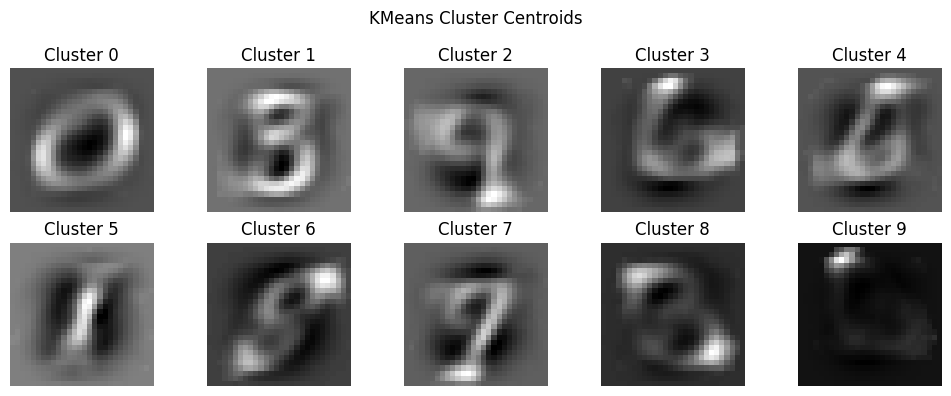

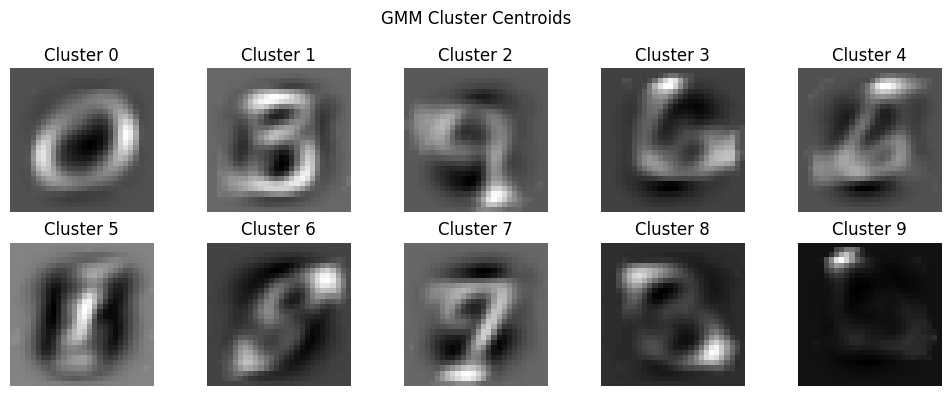

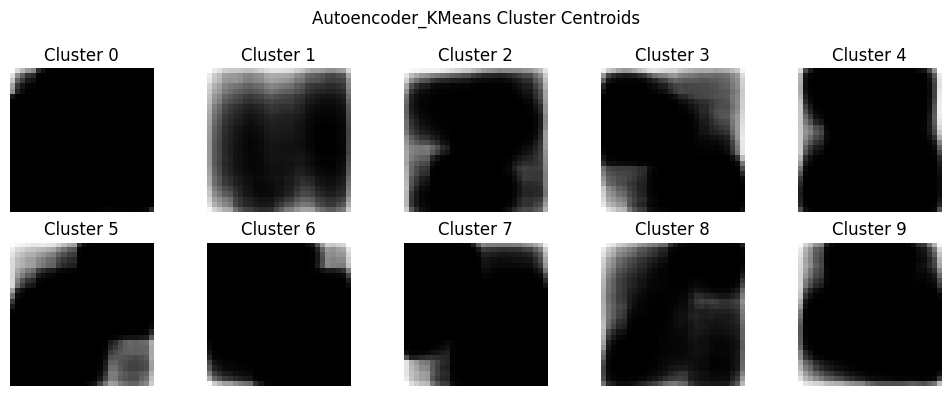

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import hdbscan
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd

def compare_clustering_algorithms(image_dataset_path, num_clusters=10, subset_size=10000):
    """
    Run multiple clustering algorithms on an unlabelled handwritten digits dataset,
    store results, and compare performance.
    
    Parameters:
    - image_dataset_path (str): Path to the .npy file containing the dataset.
    - num_clusters (int): Expected number of clusters (default 10 for digits 0-9).
    - subset_size (int): Size of subset to use for faster computation (default 10,000).
    
    Returns:
    - results (dict): Dictionary with algorithm names and their results (labels, metrics).
    """
    
    # Load and preprocess the dataset
    Xtrain_img = np.load(image_dataset_path)
    print("Dataset shape:", Xtrain_img.shape)
    
    # Normalize pixel values to [0, 1]
    if Xtrain_img.max() > 1:
        Xtrain_img = Xtrain_img / 255.0
        print("Normalized pixel values to [0, 1]")
    
    # Use a subset for faster computation
    indices = np.random.choice(Xtrain_img.shape[0], subset_size, replace=False)
    X_subset = Xtrain_img[indices]
    X_flat = X_subset.reshape(subset_size, -1)
    print("Subset shape (flattened):", X_flat.shape)
    
    # Standardize features for clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_flat)
    
    # Initialize results dictionary
    results = {}
    
    # List of algorithms to compare
    algorithms = {
        'KMeans': KMeans(n_clusters=num_clusters, random_state=42),
        'DBSCAN': DBSCAN(eps=5.0, min_samples=5),
        'GMM': GaussianMixture(n_components=num_clusters, random_state=42),
        'HDBSCAN': hdbscan.HDBSCAN(min_cluster_size=50),
        'Agglomerative': AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    }
    
    # Run traditional clustering algorithms
    for name, algo in algorithms.items():
        print(f"Running {name}...")
        try:
            if name == 'GMM':
                cluster_labels = algo.fit_predict(X_scaled)
            else:
                cluster_labels = algo.fit_predict(X_scaled)
            
            num_clusters_found = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            
            if num_clusters_found > 1:
                sil_score = silhouette_score(X_scaled, cluster_labels, sample_size=1000)
                db_score = davies_bouldin_score(X_scaled, cluster_labels)
            else:
                sil_score = np.nan
                db_score = np.nan
            
            results[name] = {
                'labels': cluster_labels,
                'silhouette_score': sil_score,
                'davies_bouldin_score': db_score,
                'num_clusters': num_clusters_found
            }
            print(f"{name}: {num_clusters_found} clusters, Silhouette: {sil_score:.4f}, DB: {db_score:.4f}")
        
        except Exception as e:
            print(f"Error in {name}: {str(e)}")
            results[name] = {
                'labels': None,
                'silhouette_score': np.nan,
                'davies_bouldin_score': np.nan,
                'num_clusters': 0
            }
    
    # Autoencoder + K-means
    print("Training Convolutional Autoencoder...")
    X_images = X_subset.reshape(-1, 28, 28, 1)
    
    # Build autoencoder
    input_img = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    # Define encoder and decoder
    encoder = models.Model(input_img, encoded)
    encoded_input = layers.Input(shape=(7, 7, 16))
    x = autoencoder.layers[-5](encoded_input)
    for layer in autoencoder.layers[-4:]:
        x = layer(x)
    decoder = models.Model(encoded_input, x)
    
    # Train autoencoder
    autoencoder.fit(X_images, X_images, epochs=10, batch_size=128, verbose=1)
    
    # Extract encoded features
    encoded_features = encoder.predict(X_images)
    encoded_features_flat = encoded_features.reshape(subset_size, -1)
    
    # Standardize encoded features
    encoded_scaled = scaler.fit_transform(encoded_features_flat)
    
    # Apply k-means on encoded features
    print("Running K-means on Autoencoder features...")
    kmeans_ae = KMeans(n_clusters=num_clusters, random_state=42)
    ae_labels = kmeans_ae.fit_predict(encoded_scaled)
    
    # Compute metrics
    sil_score_ae = silhouette_score(encoded_scaled, ae_labels, sample_size=1000)
    db_score_ae = davies_bouldin_score(encoded_scaled, ae_labels)
    
    # Decode centroids to image space
    centroids_encoded = kmeans_ae.cluster_centers_.reshape(num_clusters, 7, 7, 16)
    centroids_decoded = decoder.predict(centroids_encoded).reshape(num_clusters, 28, 28)
    
    # Store results
    results['Autoencoder_KMeans'] = {
        'labels': ae_labels,
        'silhouette_score': sil_score_ae,
        'davies_bouldin_score': db_score_ae,
        'num_clusters': num_clusters,
        'centroids': centroids_decoded,
        'reconstruction_loss': autoencoder.evaluate(X_images, X_images, verbose=0)
    }
    print(f"Autoencoder + K-means: {num_clusters} clusters, Silhouette: {sil_score_ae:.4f}, "
          f"DB: {db_score_ae:.4f}, Reconstruction Loss: {results['Autoencoder_KMeans']['reconstruction_loss']:.4f}")
    
    # Compare results
    comparison = {
        'Algorithm': [],
        'Silhouette Score': [],
        'Davies-Bouldin Score': [],
        'Number of Clusters': []
    }
    for name, result in results.items():
        comparison['Algorithm'].append(name)
        comparison['Silhouette Score'].append(result['silhouette_score'])
        comparison['Davies-Bouldin Score'].append(result['davies_bouldin_score'])
        comparison['Number of Clusters'].append(result['num_clusters'])
    
    comparison_df = pd.DataFrame(comparison)
    print("\nComparison of Clustering Algorithms:")
    print(comparison_df)
    
    # Visualize centroids
    for name in ['KMeans', 'GMM', 'Autoencoder_KMeans']:
        if name in results and results[name]['labels'] is not None:
            if name == 'Autoencoder_KMeans':
                centroids = results[name]['centroids']
            else:
                centroids = (algorithms[name].cluster_centers_ if name == 'KMeans' else 
                           algorithms[name].means_).reshape(num_clusters, 28, 28)
            
            plt.figure(figsize=(10, 4))
            for i in range(min(num_clusters, 10)):
                plt.subplot(2, 5, i + 1)
                plt.imshow(centroids[i], cmap='gray')
                plt.title(f"Cluster {i}")
                plt.axis('off')
            plt.suptitle(f"{name} Cluster Centroids")
            plt.tight_layout()
            plt.show()
    
    return results

if __name__ == "__main__":
    image_dataset_path = "../datasets/unlabelled_train_data_images.npy"
    results = compare_clustering_algorithms(image_dataset_path, num_clusters=10, subset_size=10000)